In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5


1875/1875 [==============================] - 16s 7ms/step - loss: 0.2381 - accuracy: 0.9291 - val_loss: 0.0945 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0968 - accuracy: 0.9707 - val_loss: 0.0599 - val_accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0680 - accuracy: 0.9790 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0364 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0246 - val_accuracy: 0.9934


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0621 - accuracy: 0.9813


[0.06208605319261551, 0.9812999963760376]

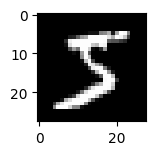

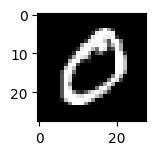

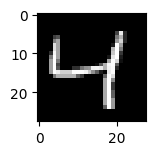

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [27]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

2021-12-16 21:35:32.650796: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: lenet_5_model/assets
['saved_model.pb', 'variables', 'assets']


In [28]:
lenet_5_model.save("my.h5")

In [32]:
lenet_5_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [34]:
json_model = lenet_5_model.to_json()

In [35]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [36]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [44]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[ 6.68141693e-02,  3.90601605e-01, -4.71222140e-02,
          -2.57536042e-02,  1.28076300e-01, -2.57163763e-01]],

        [[ 5.09936273e-01, -1.82029694e-01,  1.39288381e-01,
          -2.35588476e-02,  2.86766291e-01, -1.17572233e-01]],

        [[ 5.84757566e-01, -5.32301366e-01,  5.08587100e-02,
          -2.86958277e-01,  6.45525530e-02,  4.10433978e-01]],

        [[ 1.02631763e-01, -6.17669880e-01,  2.34685853e-01,
          -2.68182874e-01,  4.34194237e-01,  4.54737902e-01]],

        [[-1.26116991e-01, -1.23500511e-01,  2.58246332e-01,
           7.00357482e-02,  3.76941115e-01,  4.01081383e-01]]],


       [[[ 3.26076925e-01,  3.59698862e-01,  2.49535486e-01,
          -3.06994058e-02,  3.55702490e-01, -3.60050529e-01]],

        [[ 8.32371175e-01, -2.53291667e-01,  3.74732196e-01,
           1.12577178e-01,  1.29559278e-01, -3.32056582e-01]],

        [[ 5.33719182e-01, -9.69543278e-01,  1.92305014e-01,
          -3.43296707e-01,  2.46924967e-01, -2.94832706e-01]],